In [9]:
import os
import mectools.data as dt
import PIL

In [22]:
plt = plotter(backend='Agg')
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# args
seed = 2384923
samp = 0.01
BATCH_SIZE = 32
size = 1024

In [3]:
def load_path(tag, base='tiles/density', ext='jpg'):
    tag = f'{tag:07d}'
    sub = tag[:4]
    return f'{base}/{size}px/{sub}/{tag}.{ext}'

In [4]:
firms = pd.read_csv('firms/census_2004_geocode.csv', usecols=['id', 'industry', 'income', 'total_assets', 'employees'])
targ = pd.read_csv('targets/census_firms_2004.csv', usecols=['id', 'lat_wgs84', 'lon_wgs84'])
firms = pd.merge(firms, targ, on='id', how='left').dropna()

In [5]:
firms['file'] = firms['id'].apply(load_path)
firms['fexist'] = firms['file'].apply(os.path.exists)
firms = firms[firms['fexist']].drop('fexist', axis=1)

In [6]:
firms['prod'] = firms['income']/firms['employees']
firms['lprod'] = dt.log(firms['prod'])
firms = firms.dropna(subset=['lprod'])

/home/doug/bin/mectools/data.py:29: RuntimeWarning: divide by zero encountered in log
  return noinf(np.log(s))


In [10]:
density = np.stack([np.array(PIL.Image.open(fn)) for fn in firms['file']])

In [15]:
firms['dense_128'] = density.reshape((len(firms), -1)).mean(axis=1)

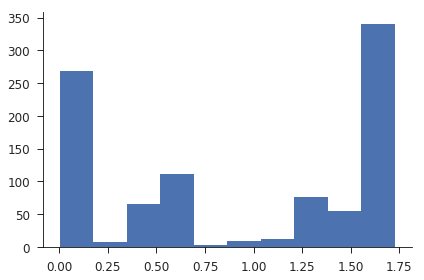

In [24]:
firms['dense_128'].hist();